All superconductors
Hight Temp SC: Contains O and Cu and Tc > 10K
Fe based SC
Conventional SC Tc < 10k

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from random import randint, sample
from sklearn.ensemble import RandomForestRegressor

from time import time
from sklearn.model_selection import GridSearchCV

In [59]:
data = pd.read_csv('train.csv')

In [60]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [61]:
data.isnull().values.any()

False

In [68]:
unique = pd.read_csv('unique_m.csv')
material_list = unique.pop('material')

In [69]:
unique.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


In [65]:
unique.isnull().values.any()

False

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


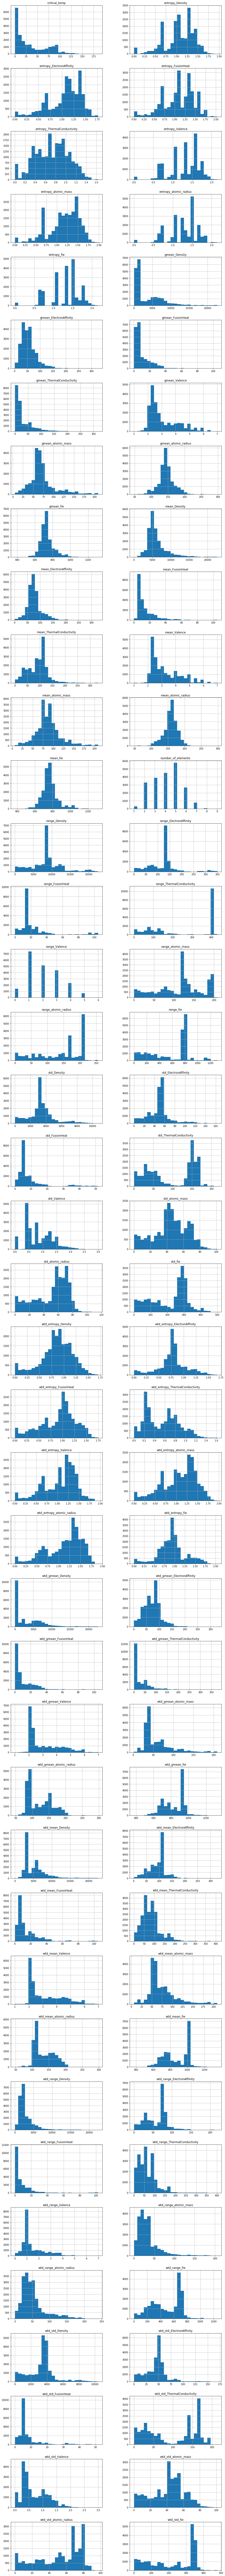

In [8]:
fig = plt.figure(figsize = (16,200))
ax = fig.gca()
data.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


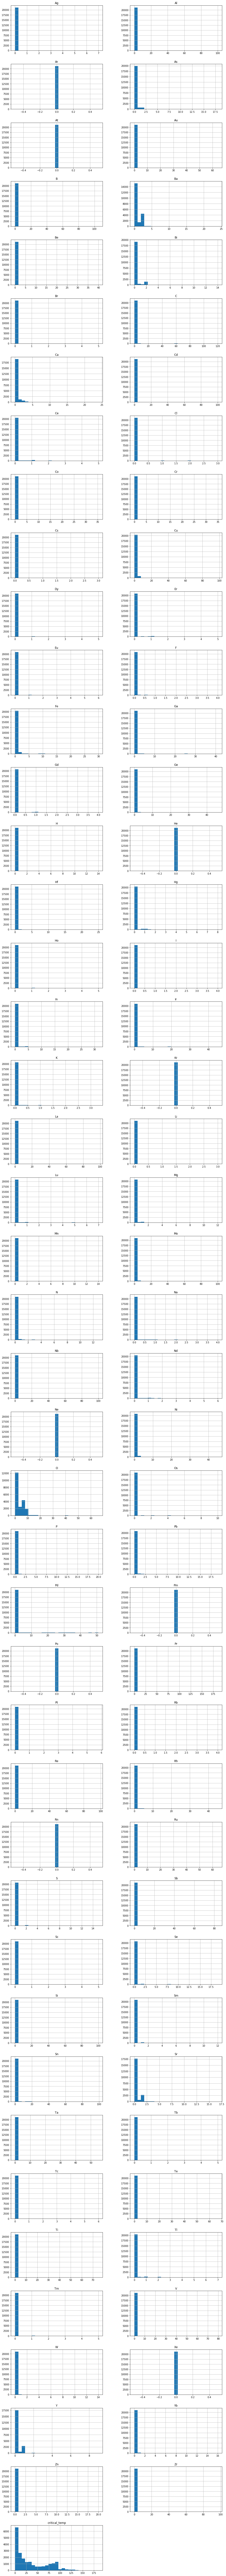

In [9]:
fig = plt.figure(figsize = (16,200))
ax = fig.gca()
unique.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

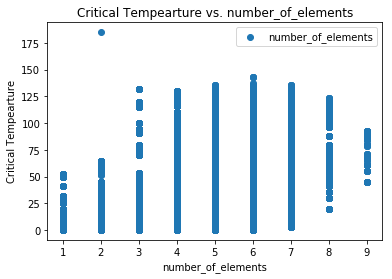

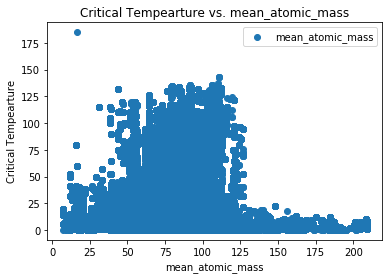

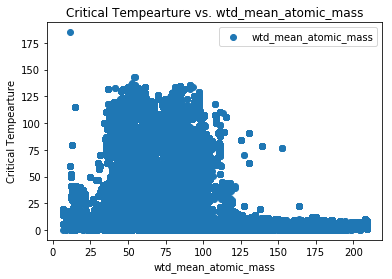

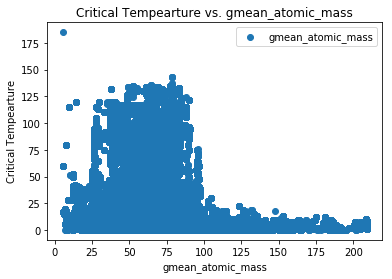

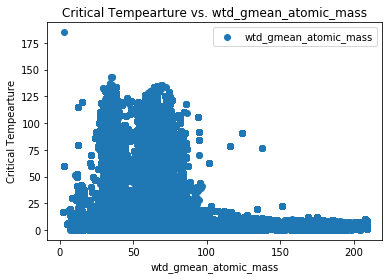

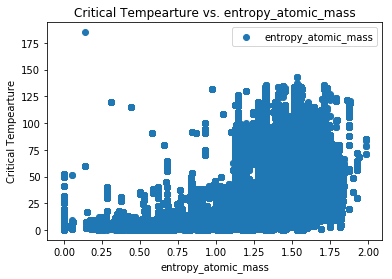

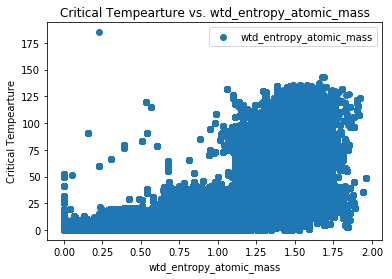

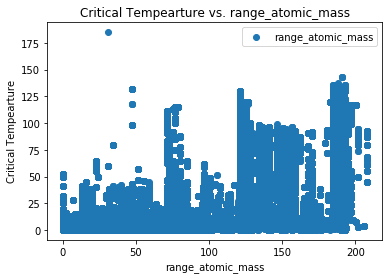

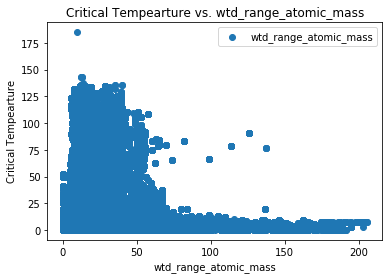

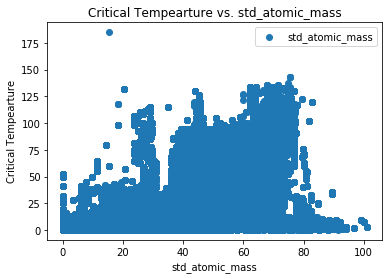

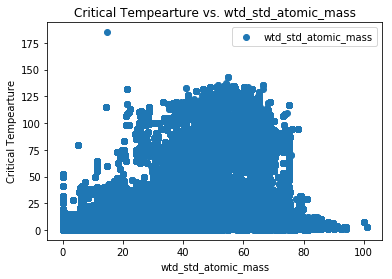

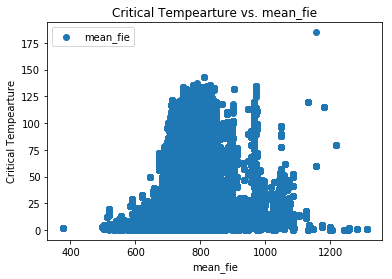

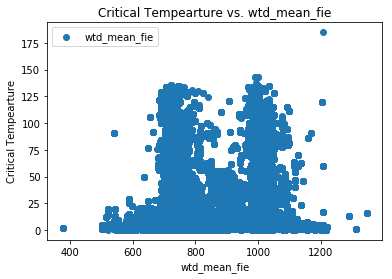

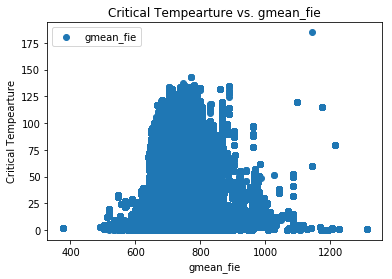

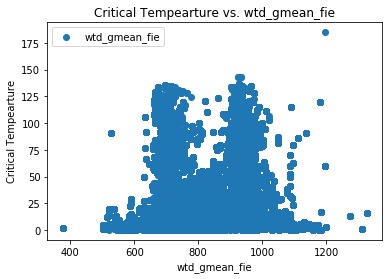

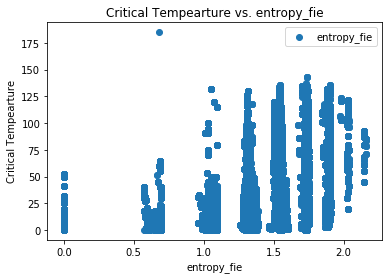

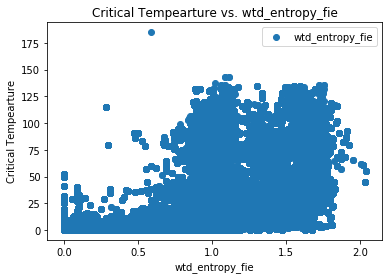

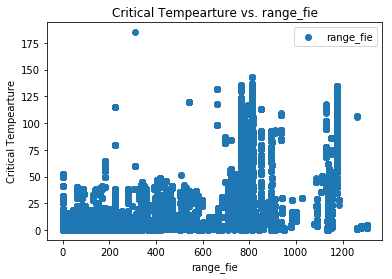

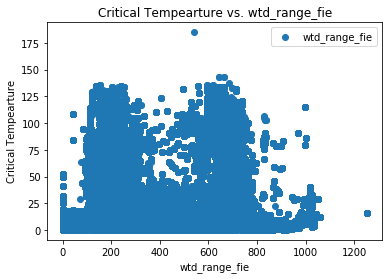

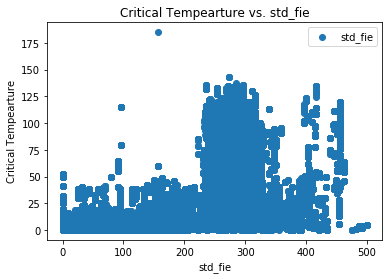

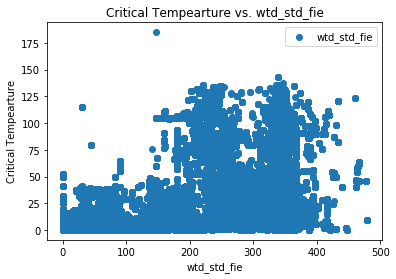

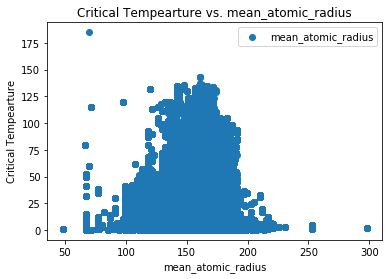

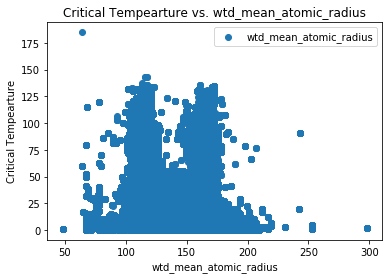

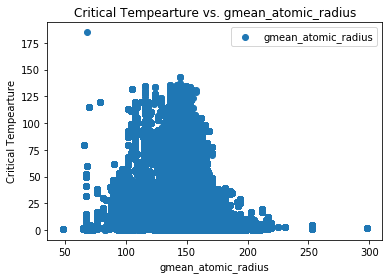

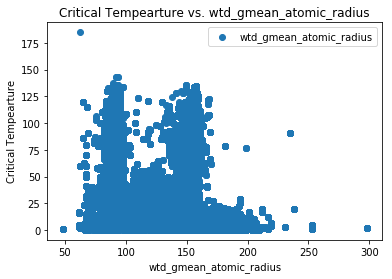

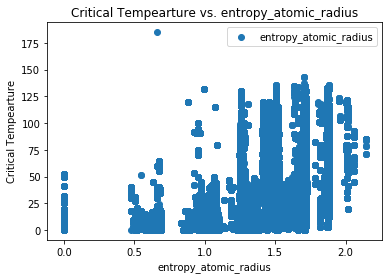

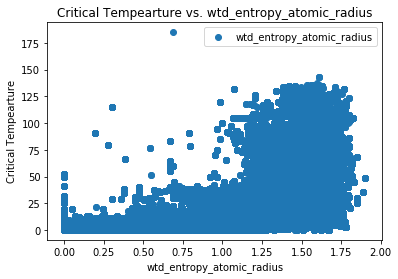

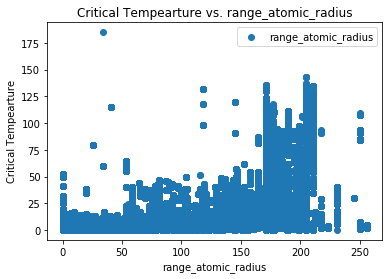

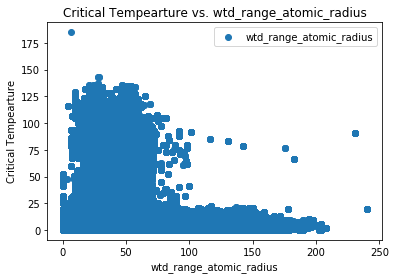

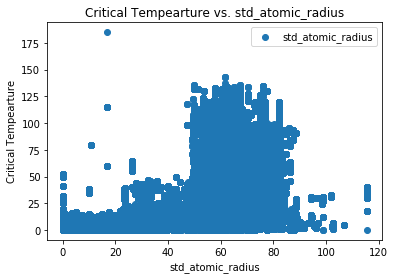

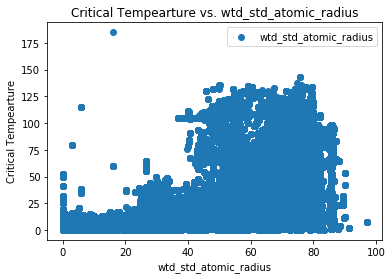

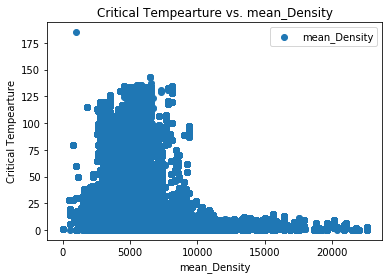

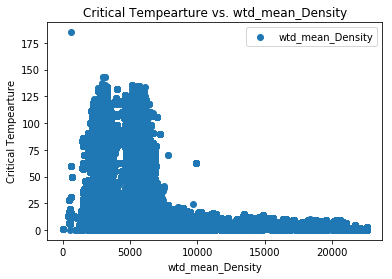

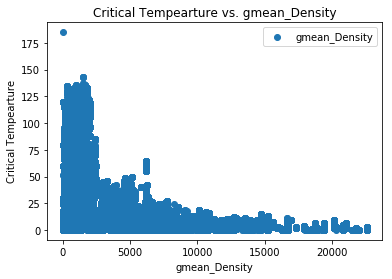

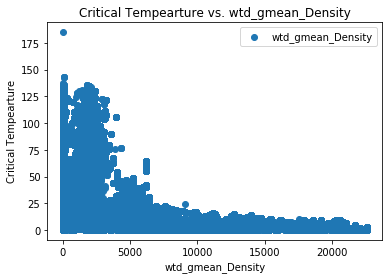

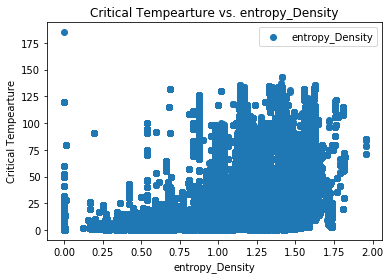

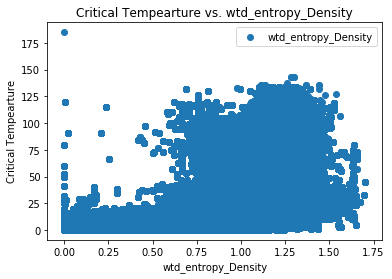

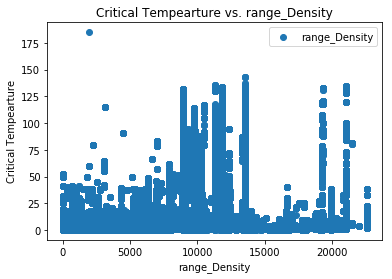

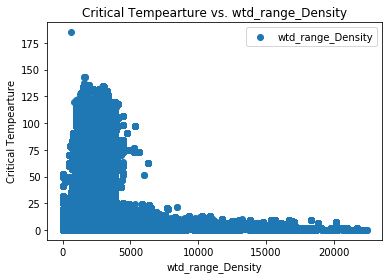

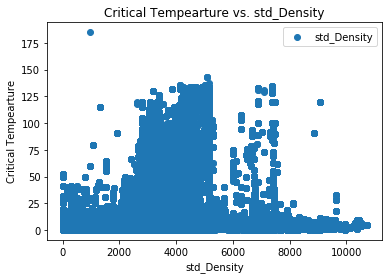

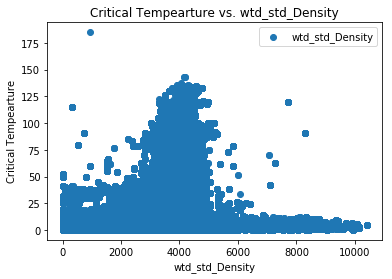

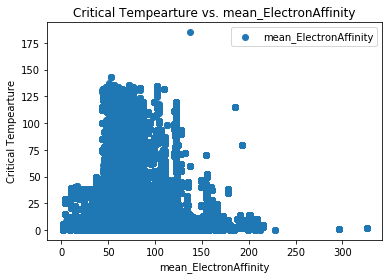

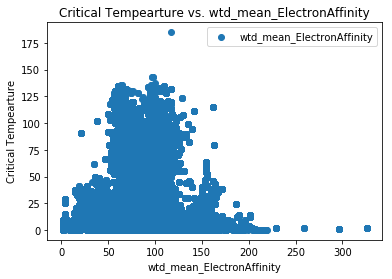

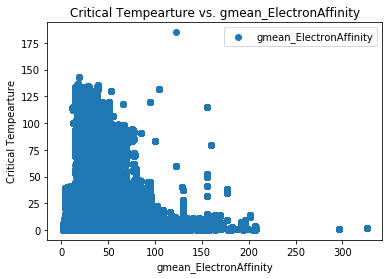

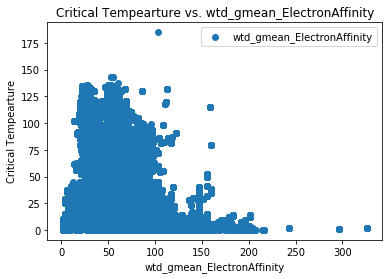

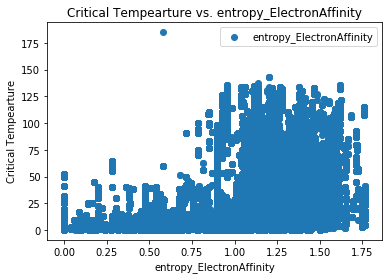

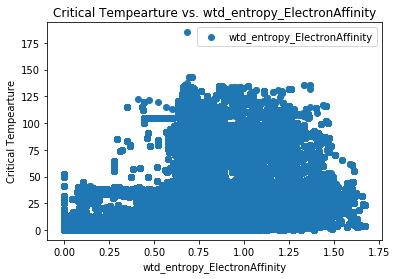

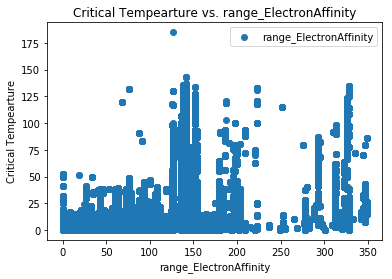

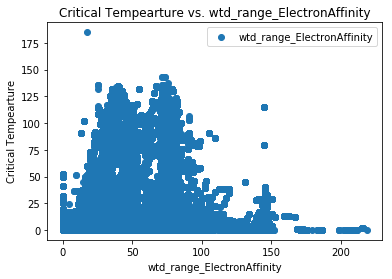

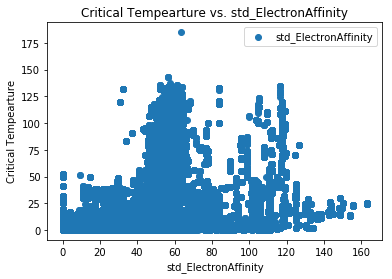

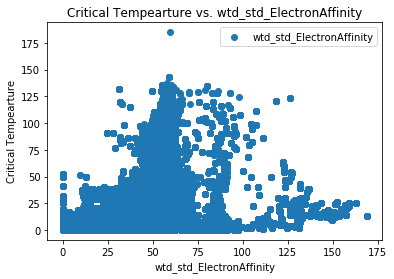

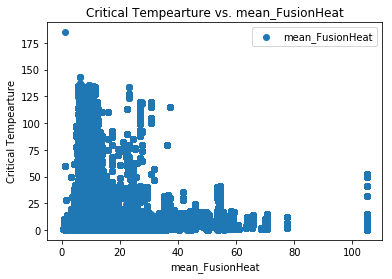

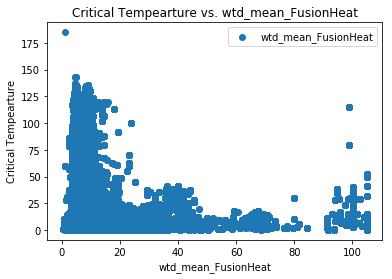

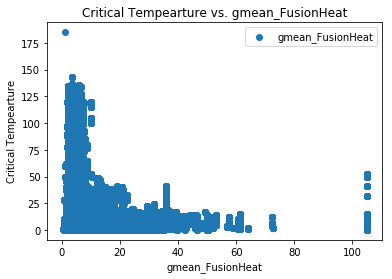

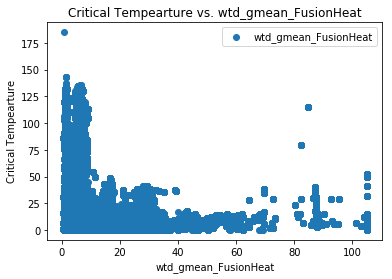

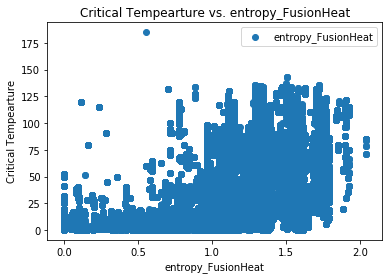

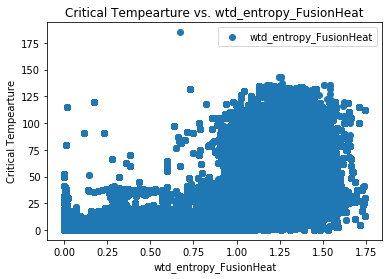

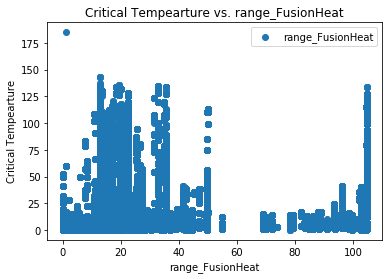

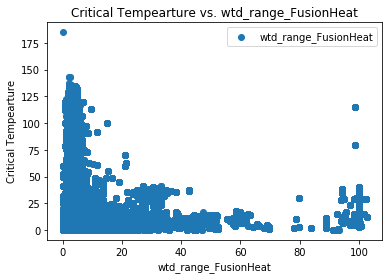

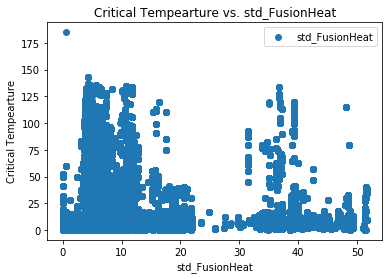

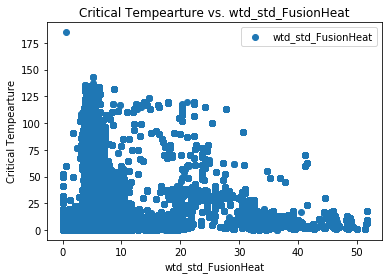

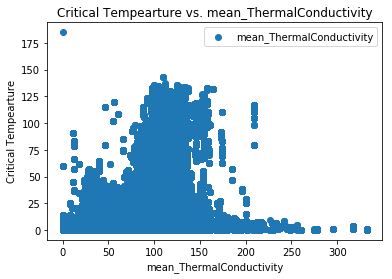

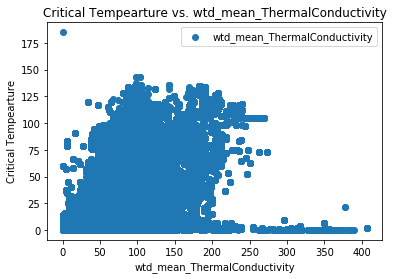

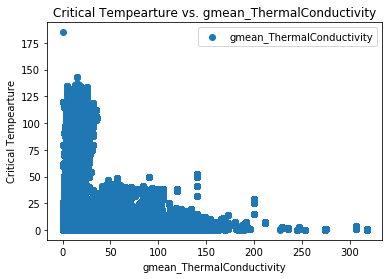

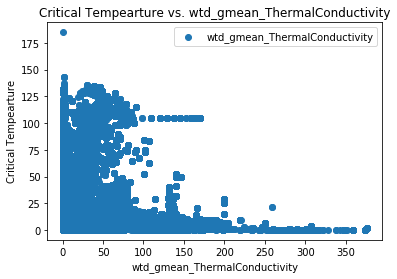

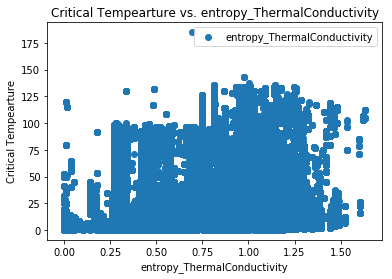

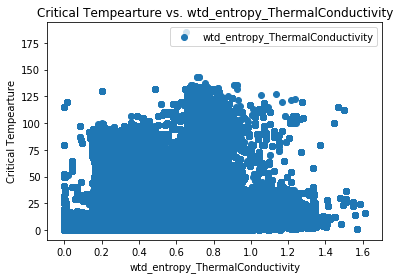

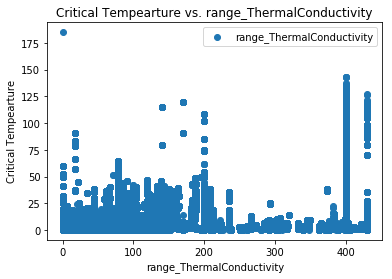

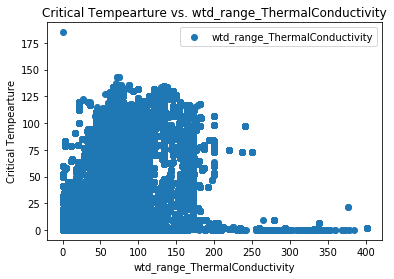

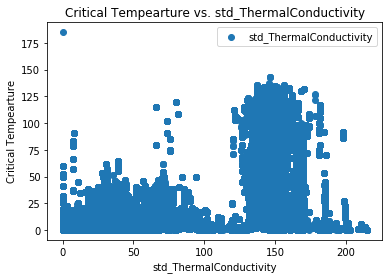

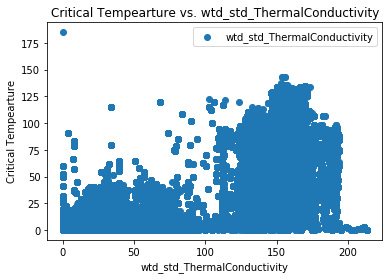

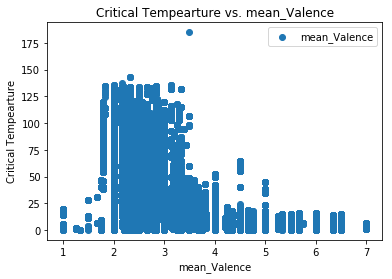

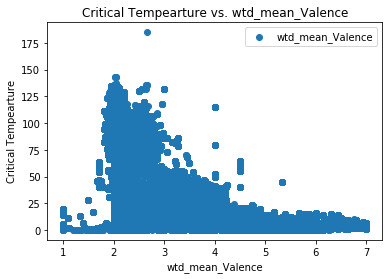

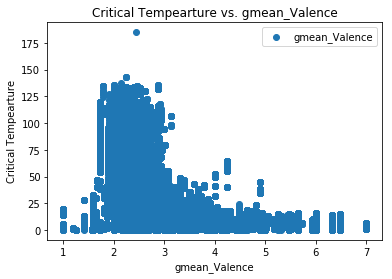

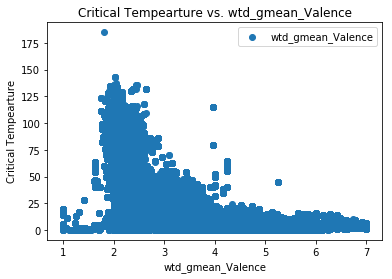

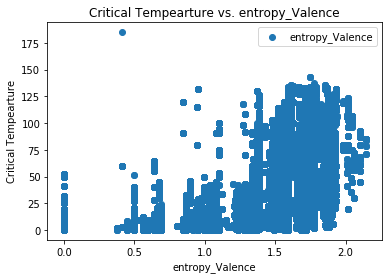

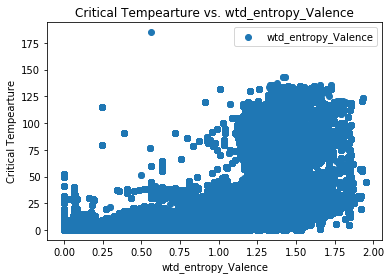

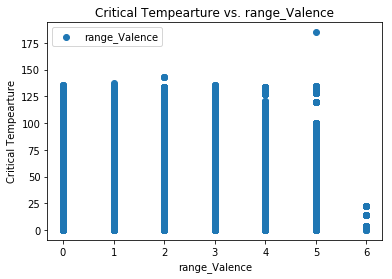

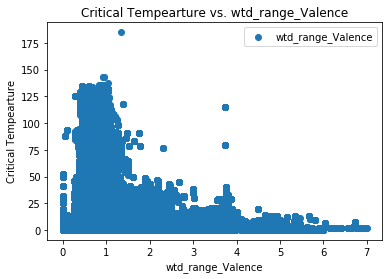

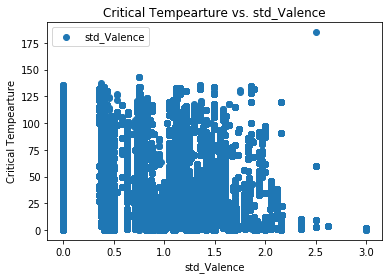

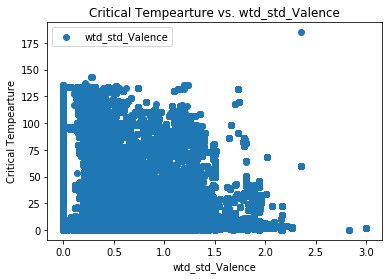

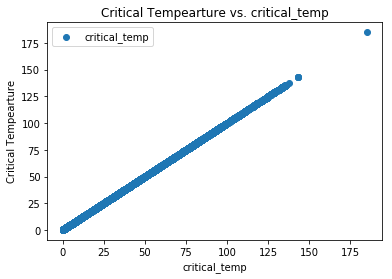

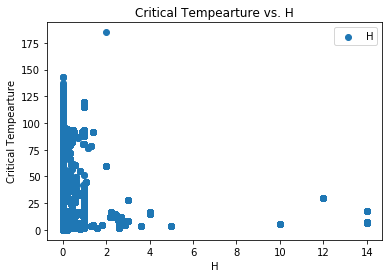

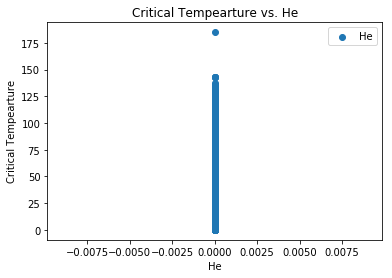

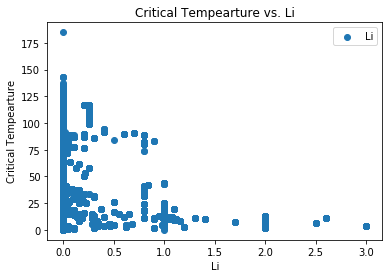

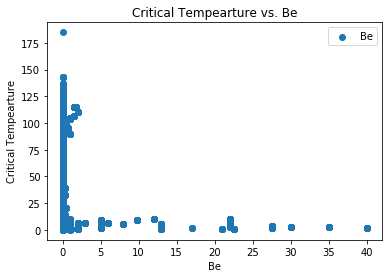

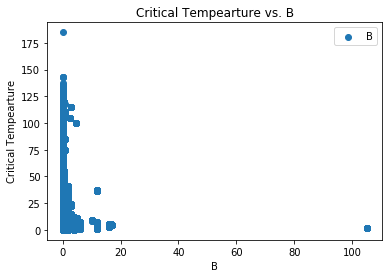

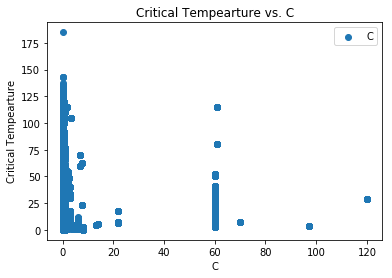

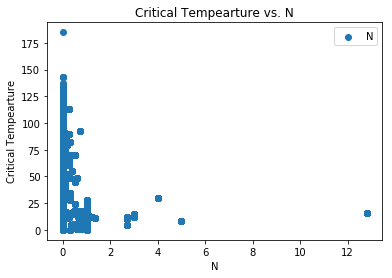

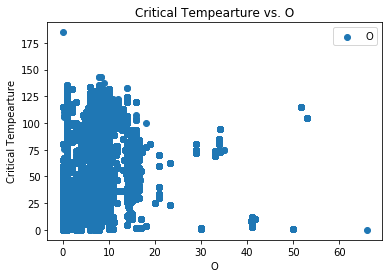

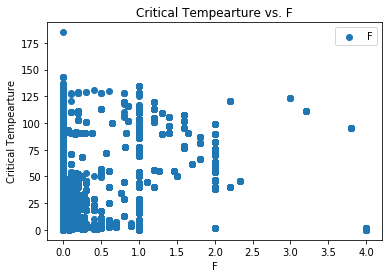

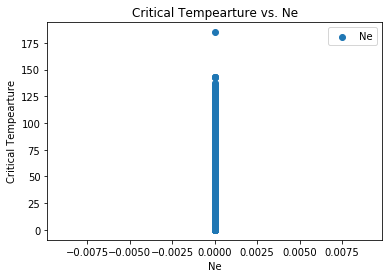

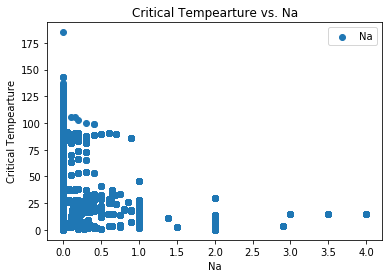

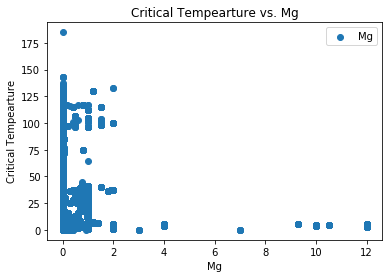

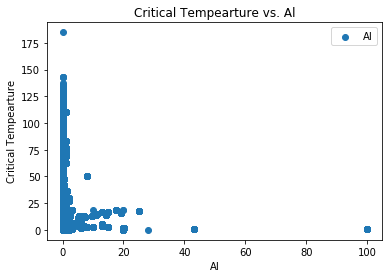

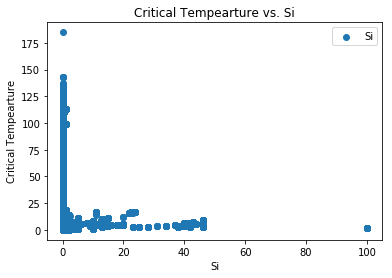

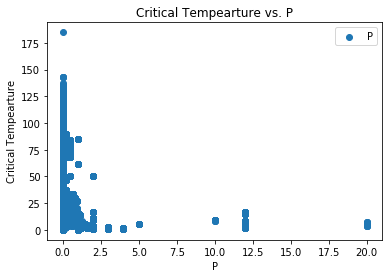

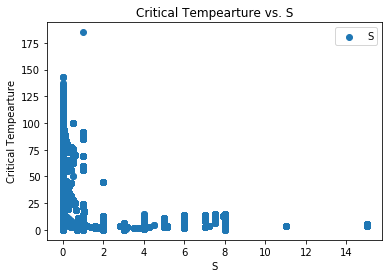

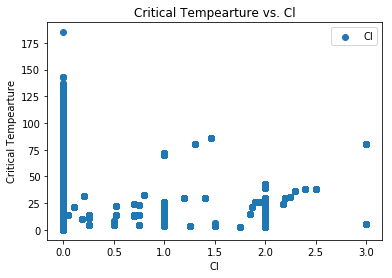

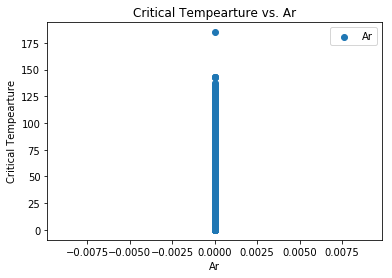

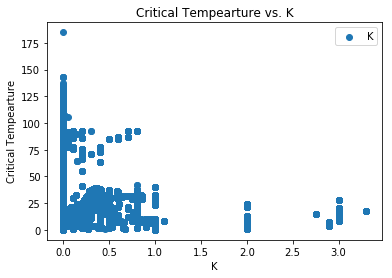

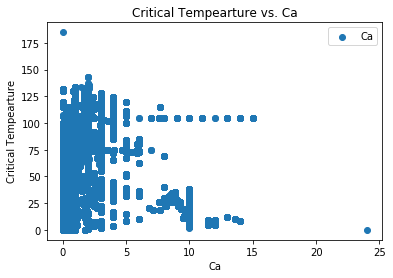

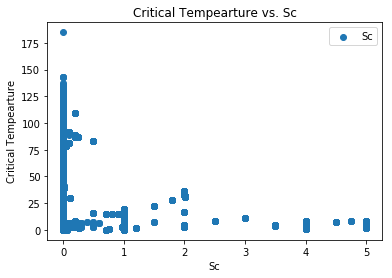

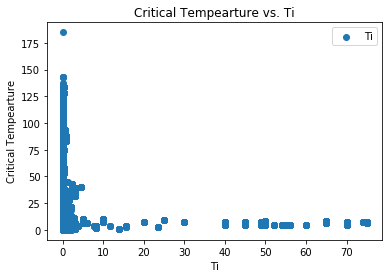

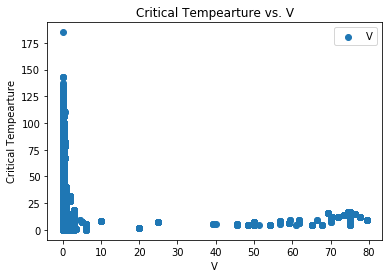

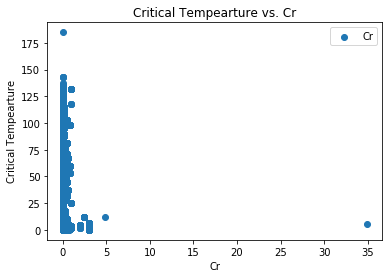

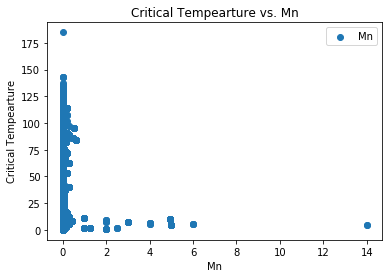

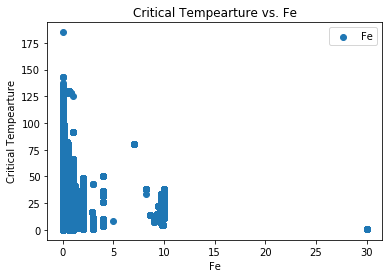

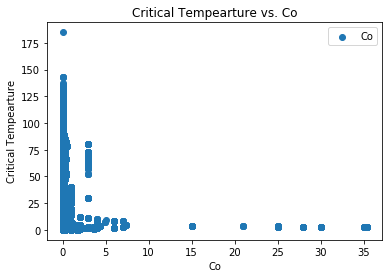

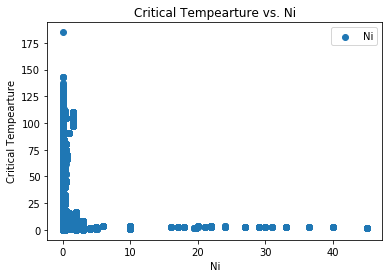

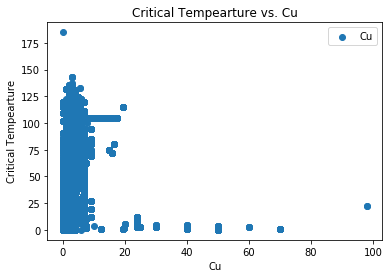

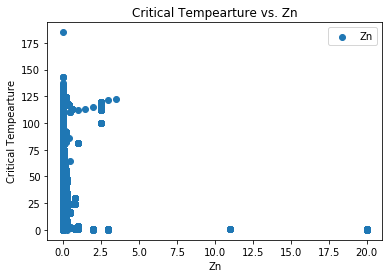

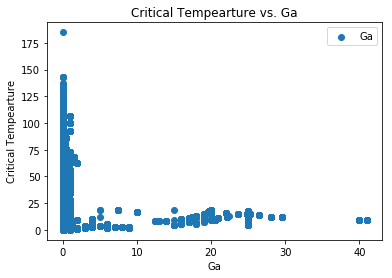

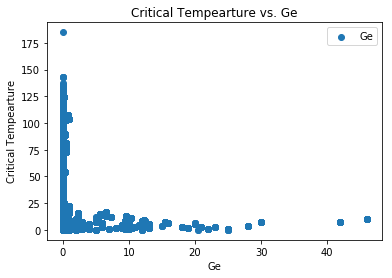

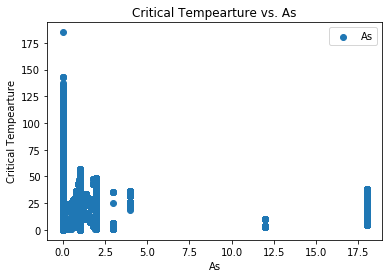

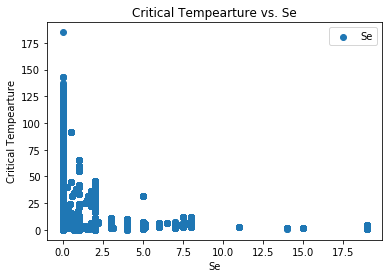

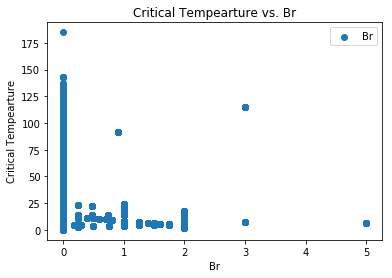

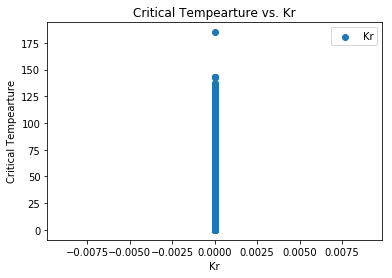

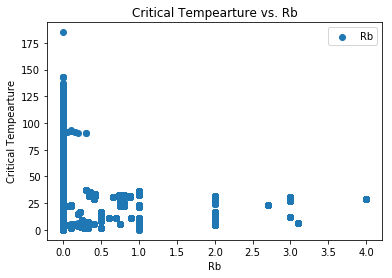

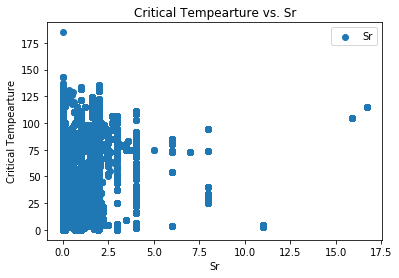

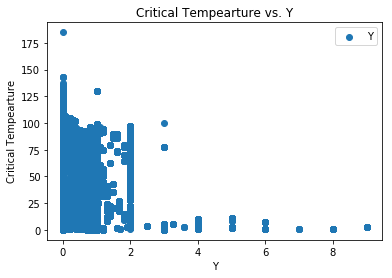

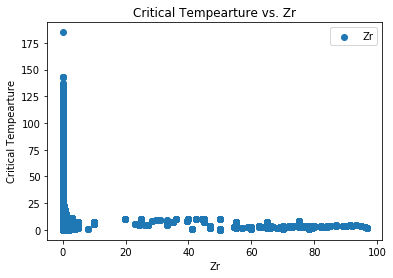

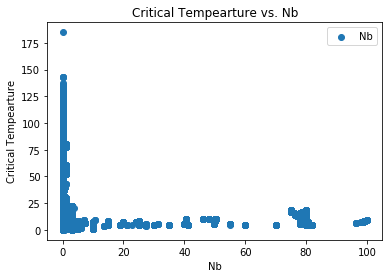

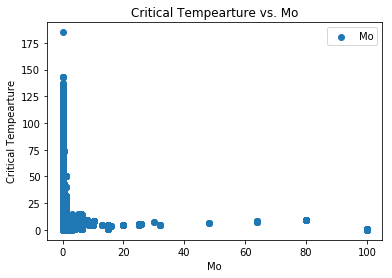

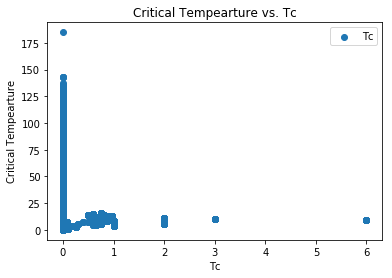

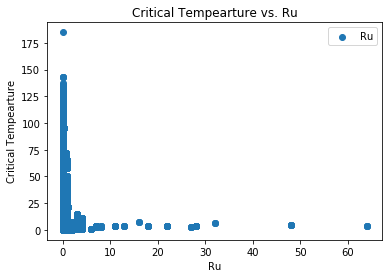

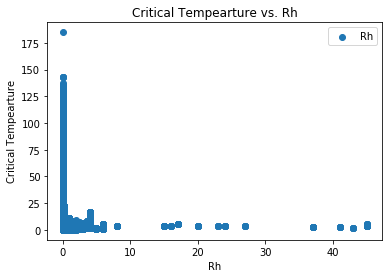

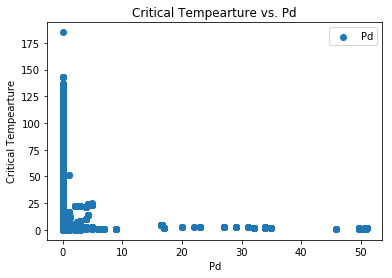

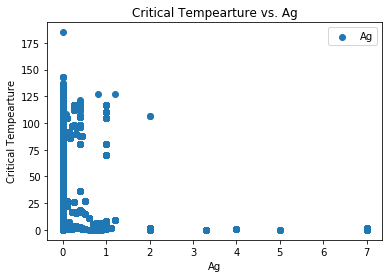

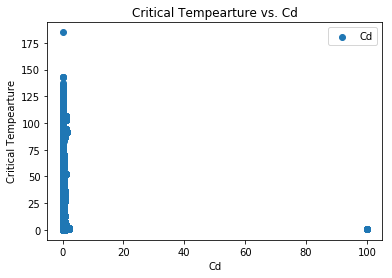

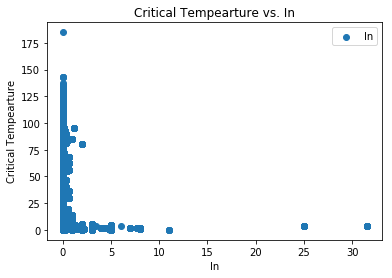

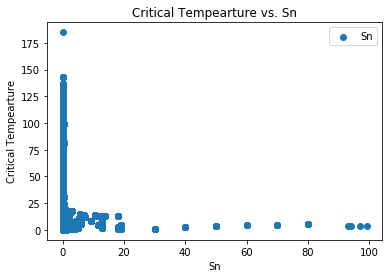

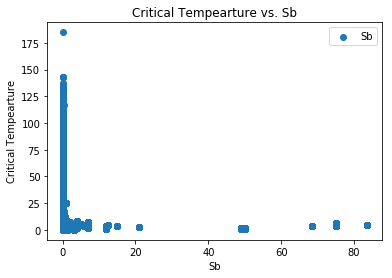

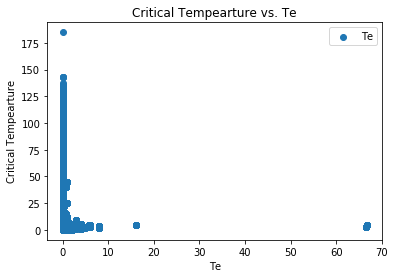

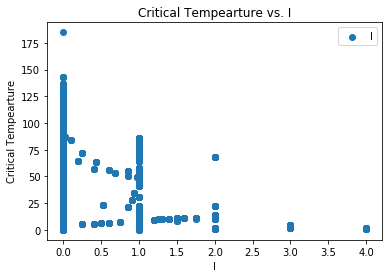

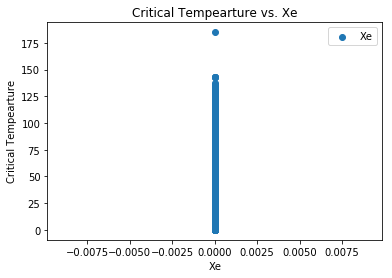

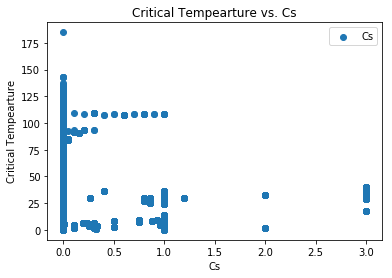

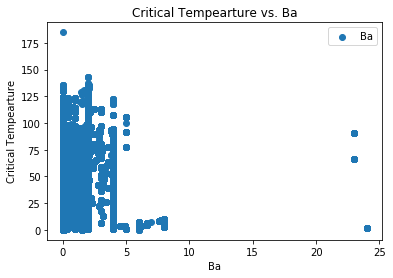

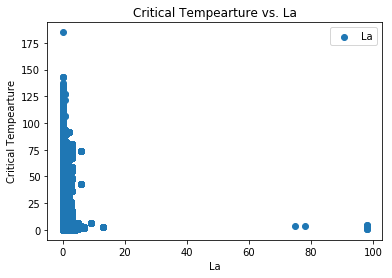

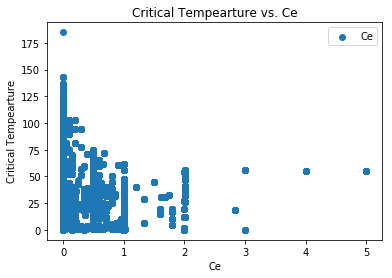

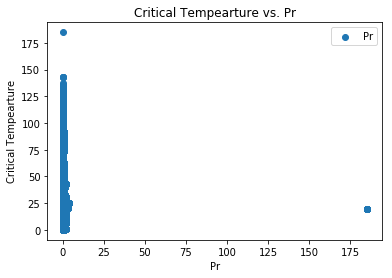

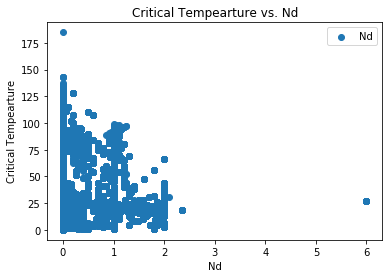

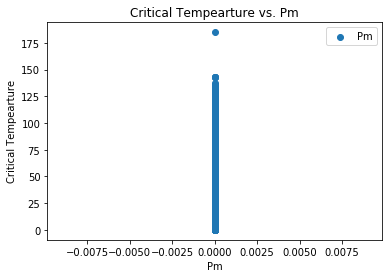

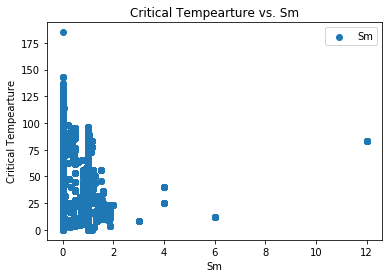

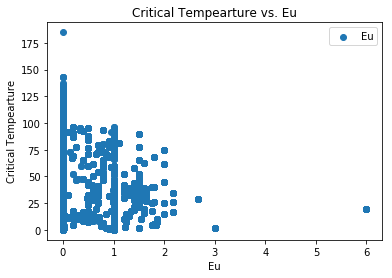

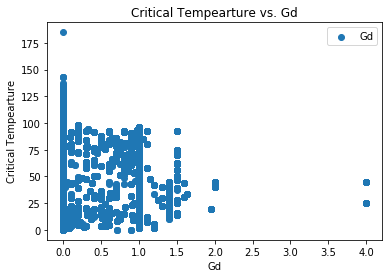

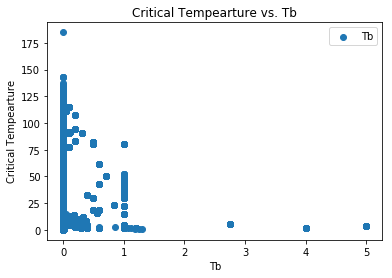

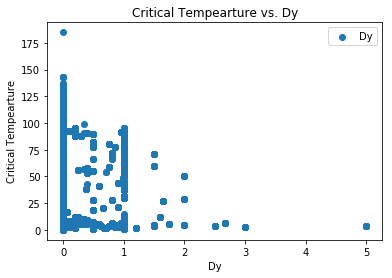

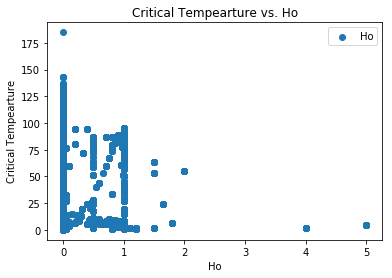

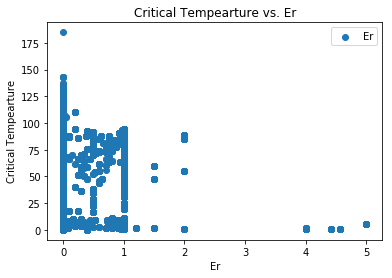

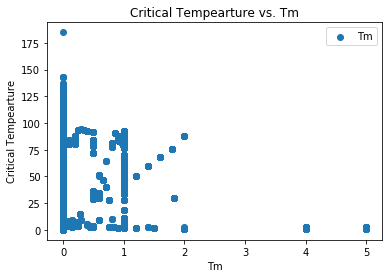

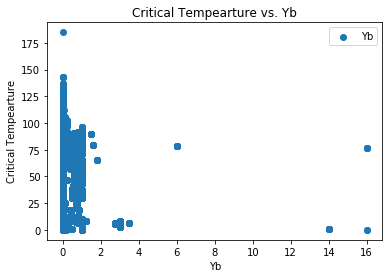

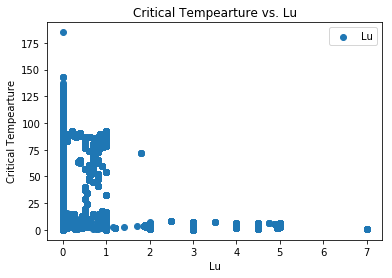

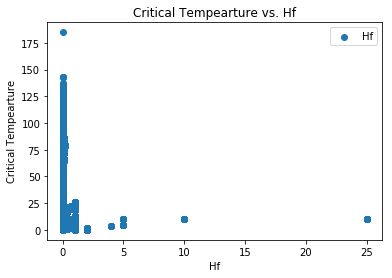

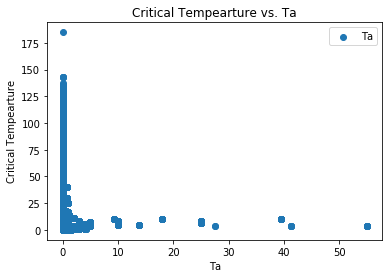

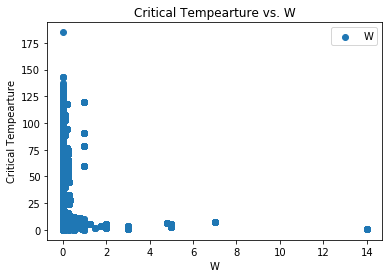

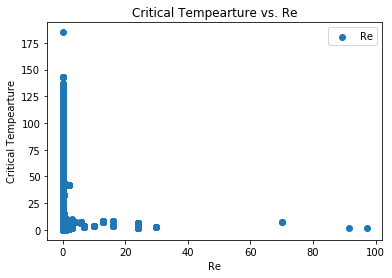

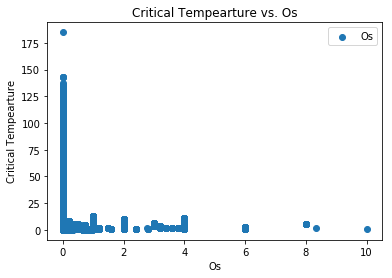

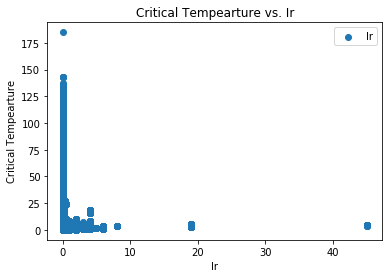

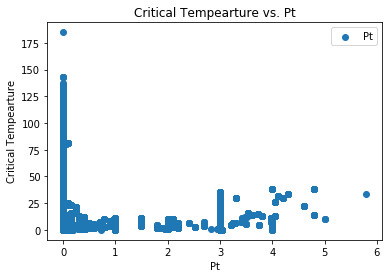

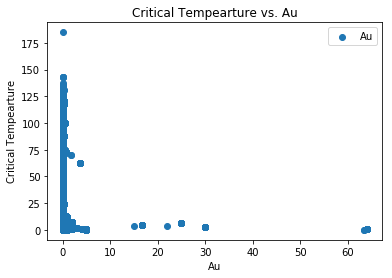

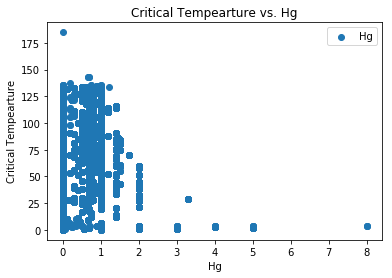

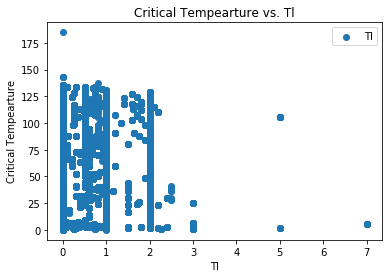

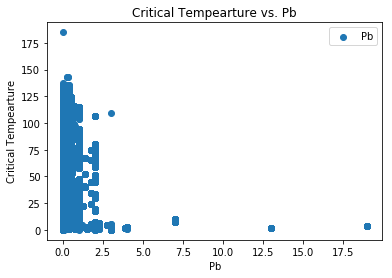

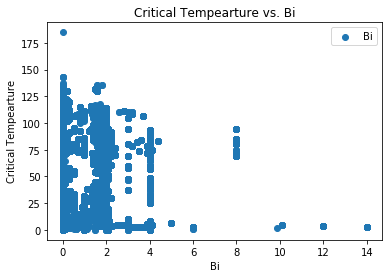

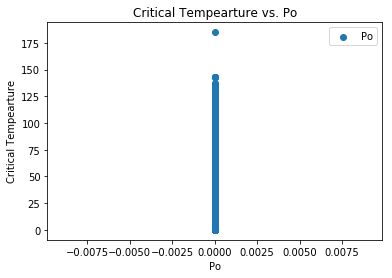

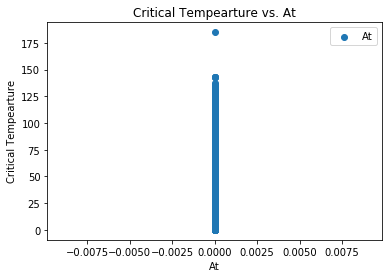

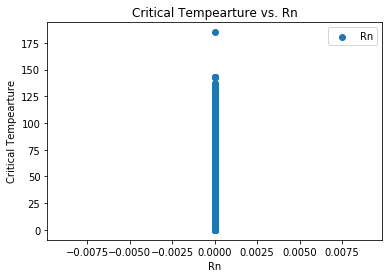

In [17]:
y = combined_data['critical_temp']
for column in combined_data:
    x = combined_data[column]
    plt.scatter(x, y, label = column)
    plt.ylabel('Critical Tempearture')
    plt.xlabel(column)
    plt.title('Critical Tempearture vs. ' + column)
    #plt.legend()
    plt.show()

In [70]:
combined_data = pd.merge(data, unique, how='right')

In [137]:
print('Tc_Mean =', combined_data.critical_temp.std(),
', Tc_Std = ',combined_data.critical_temp.mean())

Tc_Mean = 32.19404529917693 , Tc_Std =  38.135429630070114


In [71]:
def createTrainTest(df):
    train, test = train_test_split(df, test_size = 0.3)
    y_train = train.pop('critical_temp')
    y_test = test.pop('critical_temp')
    X_train = train.values
    X_test = test.values
    
    return X_train, y_train, X_test, y_test

In [46]:
HTC = combined_data[(combined_data.Cu != 0) & (combined_data.O != 0)]
Fe =combined_data[(combined_data.Fe != 0)]
SSC = combined_data[(combined_data.critical_temp < 10)]
datasets = [HTC, Fe, SSC, combined_data]

In [33]:
model = RandomForestRegressor(n_estimators=10)

In [120]:
indices = sample(range(0, len(combined_data)), 10000)

In [121]:
X_train, y_train, X_test, y_test = createTrainTest(combined_data.iloc[indices])

In [122]:
model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [123]:
model.score(X_test, y_test)

0.8906471697703815

In [128]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error')

In [138]:
MAE = abs(scores).mean()

7.31205549473771

In [ ]:
feature_importance = model.featu

In [141]:
def run_grid_search(model, params, X, y, scaled = False):
    if scaled:
        scaler = StandardScaler()
        X_train_ = scaler.fit_transform(X)
    
    grid = GridSearchCV(model, params, cv=3)
    grid.fit(X, y)
    results = grid.grid_scores_
    
    for key in params:
        optimized = key
    
    params = []
    scores = []
    for score in results:
        mean = score[1]
        try:
            param = score[0][optimized]
        except:
            print('error')
            break
            
        scores.append(abs(mean))
        params.append(param)
        
    ax = plt.subplot(111)
    ax.scatter(params, scores)
    ax.set_title('Grid Search Results for ' + str(model).split('(')[0])
    ax.set_xlabel('Parameter Tuned:' + str(optimized))
    ax.set_ylabel('Average Accuracy')
    plt.show()   

In [142]:
nTrees = {'n_estimators' : [10, 50, 100, 500, 1000]}

In [ ]:
run_grid_search(model, nTrees, X_train, y_train, scaled = False)